In [1]:
import numpy as np
import os
from PIL import Image

from scipy.ndimage import shift
from skimage import io

import matplotlib.pyplot as plt
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interactive


In [2]:
image1 = os.path.join("data",  "siemens_star.tif")
assert os.path.exists(image1), f"File does not exist: {image1}"

# Load images
data_images1 = np.array(Image.open(image1))

In [3]:
config = {
    "chip1": {"xoffset": 2, "yoffset": 1, "description": "top right chip"},
    "chip2": {"xoffset": 0, "yoffset": 0, "description": "top left and reference chip"},
    "chip3": {"xoffset": 0, "yoffset": 1, "description": "bottom left chip"},
    "chip4": {"xoffset": 2, "yoffset": 2, "description": "bottom right chip"},
}

chip_size = (256, 256)


# Applying shift correction based on the configuration

In [4]:
# max_xoffset = int(np.ceil(np.max([shift_config['chip1']['xoffset'],
#                       shift_config['chip4']['xoffset']])))
# max_yoffset = int(np.ceil(np.max([shift_config['chip3']['yoffset'],
#                       shift_config['chip4']['yoffset']])))

def apply_shift_correction(image, shift_config):

    image[np.isnan(image)] = 0
    image[np.isinf(image)] = 0

    # create an empty array for new image
    # new_image = np.zeros_like(image)
    new_image = np.zeros((image.shape[0], image.shape[1]))

    # chip 2 (fixed one)
    new_image[0:256, 0:256] = image[0:256, 0:256]

    # chip 1
    region = image[0:256, 256:]
    chips1_shift = (shift_config['chip1']['yoffset'], shift_config['chip1']['xoffset'])
    shifted_data = shift(region, shift=chips1_shift, order=3)
    new_image[0:256, 256:] = shifted_data

    # chip 3
    region = image[256:, 0:256]
    chips3_shift = (shift_config['chip3']['yoffset'], shift_config['chip3']['xoffset'])
    shifted_data = shift(region, shift=chips3_shift, order=3)
    new_image[256:, 0:256] = shifted_data

    # chip 4
    region = image[256:, 256:]
    chips4_shift = (shift_config['chip4']['yoffset'], shift_config['chip4']['xoffset'])
    shifted_data = shift(region, shift=chips4_shift, order=3)
    new_image[256:, 256:] = shifted_data

    return new_image

Text(0.5, 1.0, 'Corrected Image')

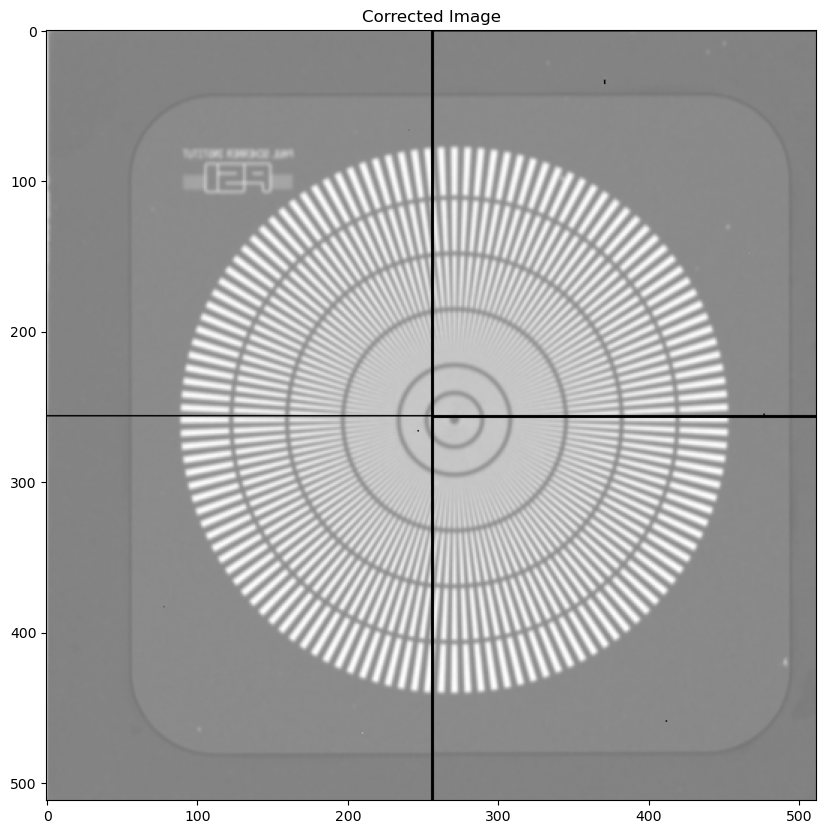

In [5]:
corrected = apply_shift_correction(data_images1, config)
raw_image = data_images1.copy()

fig, axs = plt.subplots(ncols=1, figsize=(10, 10))
axs.imshow(corrected, cmap='gray')
axs.set_title("Corrected Image")

In [6]:

zoom_size = 15
region_zoomed = [100, 110, 245, 260]

def plot_zoomed(y=100, x=100):

    fig, axs = plt.subplots(ncols=2, figsize=(15, 10))
    axs[0].imshow(corrected[y: y+zoom_size, x: x+zoom_size])
    # show grid
    axs[0].grid(True)

    axs[1].imshow(corrected)
    # display the zoomed region
    rectangle = plt.Rectangle((x, y), zoom_size, zoom_size, edgecolor='red', facecolor='none')
    axs[1].add_patch(rectangle)
    plt.show()

display_zoom = interactive(plot_zoomed, y=widgets.IntSlider(min=0, max=512-zoom_size, step=1, value=region_zoomed[0]),
                                       x=widgets.IntSlider(min=0, max=512-zoom_size, step=1, value=region_zoomed[2]))
display(display_zoom)


interactive(children=(IntSlider(value=100, description='y', max=497), IntSlider(value=245, description='x', ma…

Text(0.5, 1.0, 'Original Image')

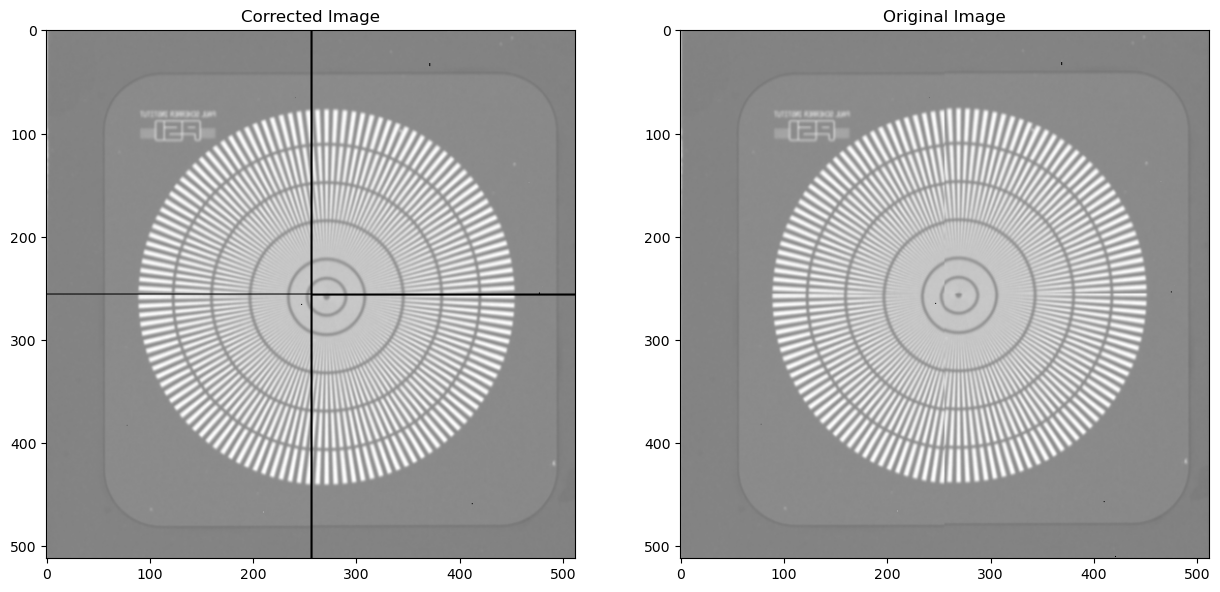

In [7]:
# let's compare the corrected image with the original one
fig, axs = plt.subplots(ncols=2, figsize=(15, 10))
axs[0].imshow(corrected, cmap='gray')
axs[0].set_title("Corrected Image")
axs[1].imshow(raw_image, cmap='gray')
axs[1].set_title("Original Image")

In [8]:
# let's make sure the counts are not affected by the shift correction
print("Total counts in original image:", np.sum(corrected))
print("Total counts in corrected image:", np.sum(raw_image))

Total counts in original image: 159264.885551095
Total counts in corrected image: 160320.27


## Let's make sure the counts are not affected by the shift correction

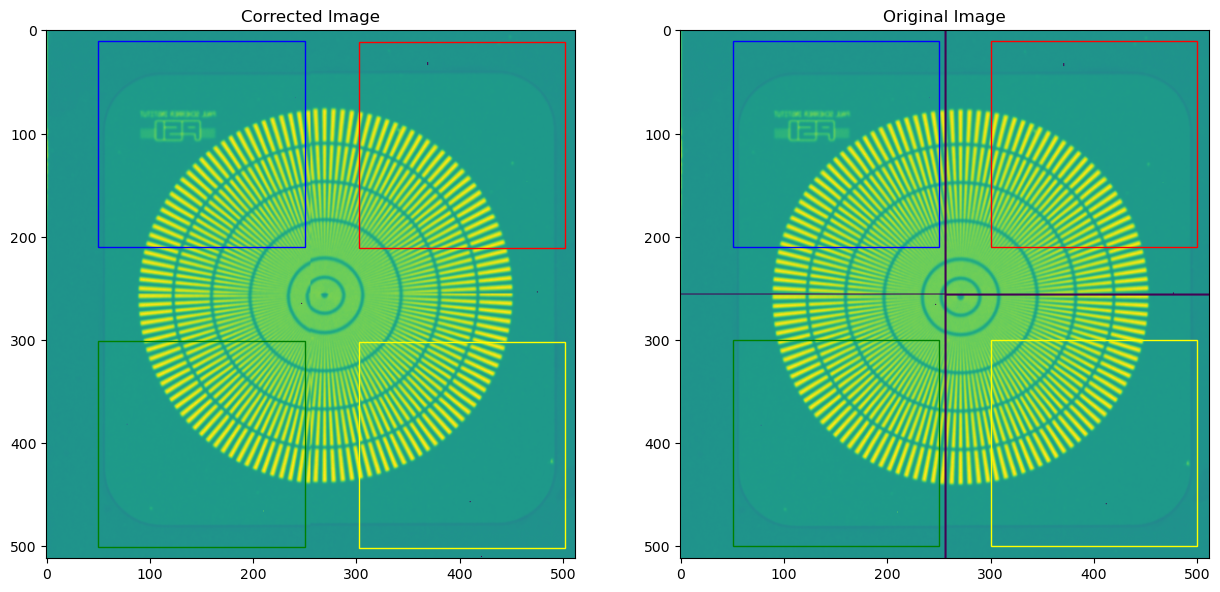

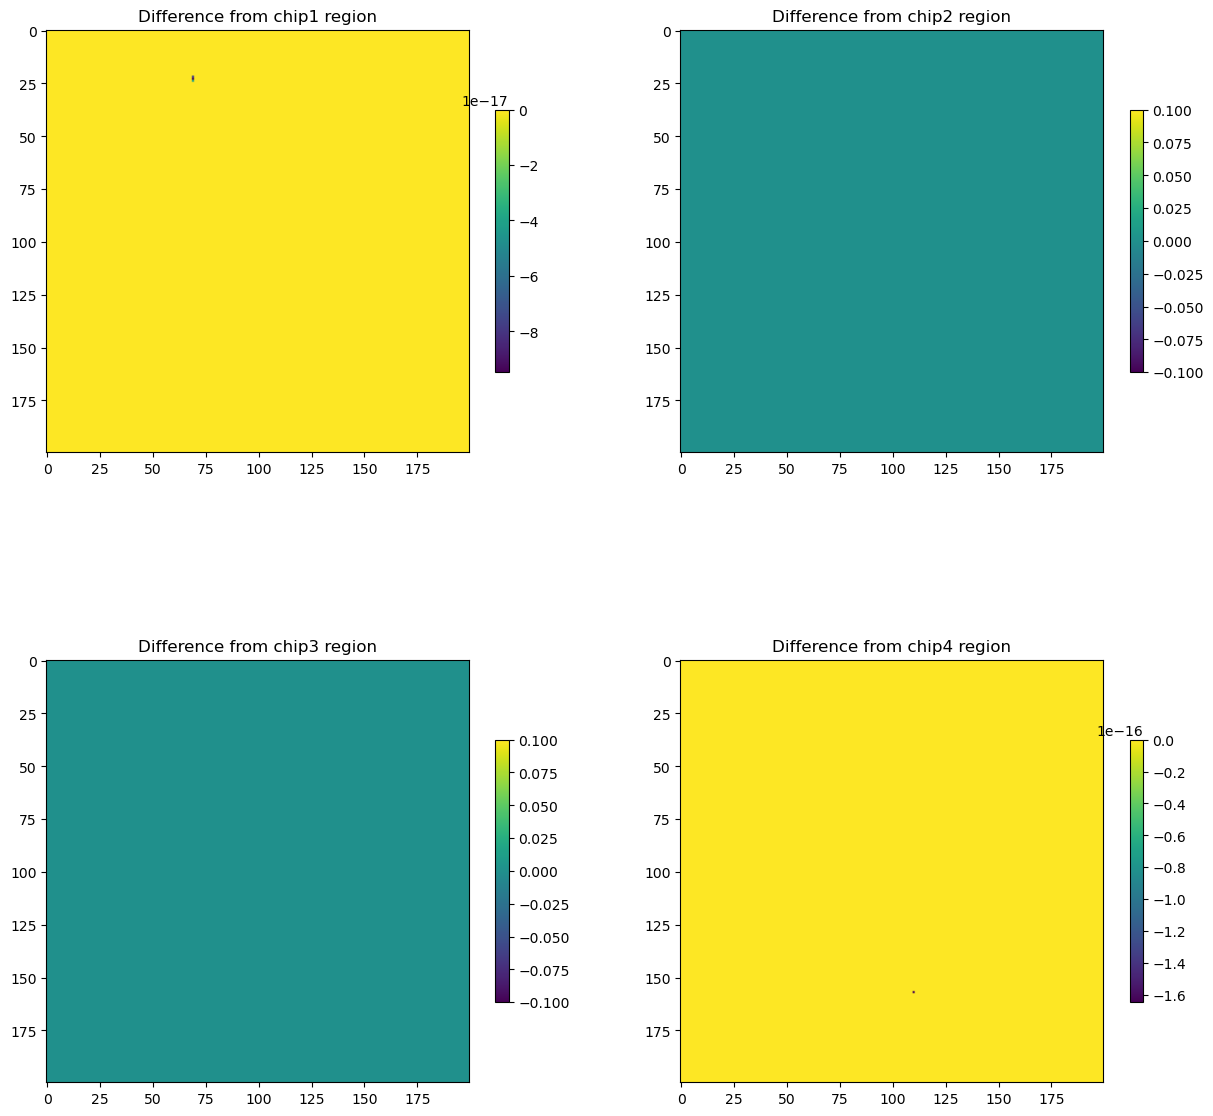

In [9]:
box_width = 200
box_height = 200

# chip1 - red
box_uncorrected_chip1 = {'x0': 300, 'y0': 10, 'x1': 300+box_width, 'y1': 10+box_height}
box_corrected_chip1 = {'x0': box_uncorrected_chip1['x0'] + config['chip1']['xoffset'], 
                   'y0': box_uncorrected_chip1['y0'] + config['chip1']['yoffset'], 
                   'x1': box_uncorrected_chip1['x1'] + config['chip1']['xoffset'], 
                   'y1': box_uncorrected_chip1['y1'] + config['chip1']['yoffset']}

# chip2 - blue
box_uncorrected_chip2 = {'x0': 50, 'y0': 10, 'x1': 50+box_width, 'y1': 10+box_height}
box_corrected_chip2 = {'x0': box_uncorrected_chip2['x0'] , 
                        'y0': box_uncorrected_chip2['y0'], 
                        'x1': box_uncorrected_chip2['x1'], 
                        'y1': box_uncorrected_chip2['y1']}

# chip3 - green
box_uncorrected_chip3 = {'x0': 50, 'y0': 300, 'x1': 50+box_width, 'y1': 300+box_height}
box_corrected_chip3 = {'x0': box_uncorrected_chip3['x0']+ config['chip3']['xoffset'],
                       'y0': box_uncorrected_chip3['y0']+ config['chip3']['yoffset'],
                       'x1': box_uncorrected_chip3['x1']+ config['chip3']['xoffset'],
                       'y1': box_uncorrected_chip3['y1']+ config['chip3']['yoffset']}

# chip4 - yellow
box_uncorrected_chip4 = {'x0': 300, 'y0': 300, 'x1': 300+box_width, 'y1': 300+box_height}
box_corrected_chip4 = {'x0': box_uncorrected_chip4['x0']+ config['chip4']['xoffset'],
                       'y0': box_uncorrected_chip4['y0']+ config['chip4']['yoffset'],
                       'x1': box_uncorrected_chip4['x1']+ config['chip4']['xoffset'],
                       'y1': box_uncorrected_chip4['y1']+ config['chip4']['yoffset']}

fig, axs = plt.subplots(ncols=2, figsize=(15, 10))
axs[0].imshow(raw_image, cmap='viridis')
axs[0].set_title("Corrected Image")
axs[1].imshow(corrected, cmap='viridis')
axs[1].set_title("Original Image")

# chip1
rectangle_corrected_chip1 = plt.Rectangle((box_corrected_chip1['x0'], box_corrected_chip1['y0']), box_height, box_width, edgecolor='red', facecolor='none')
axs[0].add_patch(rectangle_corrected_chip1)

rectangle_original_chip1 = plt.Rectangle((box_uncorrected_chip1['x0'], box_uncorrected_chip1['y0']), box_height, box_width, edgecolor='red', facecolor='none')
axs[1].add_patch(rectangle_original_chip1)

# chip2
rectangle_corrected_chip2 = plt.Rectangle((box_corrected_chip2['x0'], box_corrected_chip2['y0']), box_height, box_width, edgecolor='blue', facecolor='none')
axs[0].add_patch(rectangle_corrected_chip2)

rectangle_original_chip2 = plt.Rectangle((box_uncorrected_chip2['x0'], box_uncorrected_chip2['y0']), box_height, box_width, edgecolor='blue', facecolor='none')
axs[1].add_patch(rectangle_original_chip2)

# chip3
rectangle_corrected_chip3 = plt.Rectangle((box_corrected_chip3['x0'], box_corrected_chip3['y0']), box_height, box_width, edgecolor='green', facecolor='none')
axs[0].add_patch(rectangle_corrected_chip3) 

rectangle_original_chip3 = plt.Rectangle((box_uncorrected_chip3['x0'], box_uncorrected_chip3['y0']), box_height, box_width, edgecolor='green', facecolor='none')
axs[1].add_patch(rectangle_original_chip3)

# chip4
rectangle_corrected_chip4 = plt.Rectangle((box_corrected_chip4['x0'], box_corrected_chip4['y0']), box_height, box_width, edgecolor='yellow', facecolor='none')
axs[0].add_patch(rectangle_corrected_chip4)

rectangle_original_chip4 = plt.Rectangle((box_uncorrected_chip4['x0'], box_uncorrected_chip4['y0']), box_height, box_width, edgecolor='yellow', facecolor='none')
axs[1].add_patch(rectangle_original_chip4)

# display the differences between the two images in the selected region
fig2, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))

axs[0, 0].set_title("Difference from chip1 region")
im00 = axs[0, 0].imshow(raw_image[box_uncorrected_chip1['y0']: box_uncorrected_chip1['y1'], box_uncorrected_chip1['x0']: box_uncorrected_chip1['x1']] - 
                 corrected[box_corrected_chip1['y0']: box_corrected_chip1['y1'], box_corrected_chip1['x0']: box_corrected_chip1['x1']], cmap='viridis')
plt.colorbar(im00, ax=axs[0, 0], shrink=0.5)

axs[0, 1].set_title("Difference from chip2 region")
im01 = axs[0, 1].imshow(raw_image[box_uncorrected_chip2['y0']: box_uncorrected_chip2['y1'], box_uncorrected_chip2['x0']: box_uncorrected_chip2['x1']] - 
                 corrected[box_corrected_chip2['y0']: box_corrected_chip2['y1'], box_corrected_chip2['x0']: box_corrected_chip2['x1']], cmap='viridis')
plt.colorbar(im01, ax=axs[0, 1], shrink=0.5)

axs[1, 0].set_title("Difference from chip3 region")
im10 = axs[1, 0].imshow(raw_image[box_uncorrected_chip3['y0']: box_uncorrected_chip3['y1'], box_uncorrected_chip3['x0']: box_uncorrected_chip3['x1']] - 
                 corrected[box_corrected_chip3['y0']: box_corrected_chip3['y1'], box_corrected_chip3['x0']: box_corrected_chip3['x1']], cmap='viridis')
plt.colorbar(im10, ax=axs[1, 0], shrink=0.5)

axs[1, 1].set_title("Difference from chip4 region")
im11 = axs[1, 1].imshow(raw_image[box_uncorrected_chip4['y0']: box_uncorrected_chip4['y1'], box_uncorrected_chip4['x0']: box_uncorrected_chip4['x1']] - 
                 corrected[box_corrected_chip4['y0']: box_corrected_chip4['y1'], box_corrected_chip4['x0']: box_corrected_chip4['x1']], cmap='viridis')
plt.colorbar(im11, ax=axs[1, 1], shrink=0.5)



In [13]:
def fill_chip_gaps(image, shift_config, chip_size=(256, 256)):
    """
    Fill gaps between shifted chips using linear interpolation.

    After shift correction, zero-filled gaps appear at chip boundaries.
    This function fills them using:
      - Linear interpolation for row and column gaps
      - Bilinear interpolation for the corner intersection

    Parameters
    ----------
    image : 2D numpy array
        The shift-corrected image with gaps.
    shift_config : dict
        Chip configuration with xoffset / yoffset for each chip.
    chip_size : tuple
        (height, width) of each chip.

    Returns
    -------
    filled : 2D numpy array
        Image with inter-chip gaps filled by interpolation.
    """
    filled = image.copy().astype(float)
    h, w = chip_size

    # Offsets that define the gap sizes at each boundary
    x_gap_top   = shift_config['chip1']['xoffset']   # vertical gap width  (top half)
    y_gap_left  = shift_config['chip3']['yoffset']   # horizontal gap height (left half)
    x_gap_bot   = shift_config['chip4']['xoffset']   # vertical gap width  (bottom half)
    y_gap_right = shift_config['chip4']['yoffset']   # horizontal gap height (right half)

    max_x_gap = max(x_gap_top, x_gap_bot)
    max_y_gap = max(y_gap_left, y_gap_right)

    # ------------------------------------------------------------------
    # 1. Vertical gap – top half  (between chip 2 and chip 1)
    #    cols w … w+x_gap_top-1,  rows 0 … h-1
    # ------------------------------------------------------------------
    if x_gap_top > 0:
        left  = filled[0:h, w - 1]
        right = filled[0:h, w + x_gap_top]
        for i in range(x_gap_top):
            t = (i + 1) / (x_gap_top + 1)
            filled[0:h, w + i] = (1 - t) * left + t * right

    # ------------------------------------------------------------------
    # 2. Horizontal gap – left half  (between chip 2 and chip 3)
    #    rows h … h+y_gap_left-1,  cols 0 … w-1
    # ------------------------------------------------------------------
    if y_gap_left > 0:
        above = filled[h - 1, 0:w]
        below = filled[h + y_gap_left, 0:w]
        for j in range(y_gap_left):
            t = (j + 1) / (y_gap_left + 1)
            filled[h + j, 0:w] = (1 - t) * above + t * below

    # ------------------------------------------------------------------
    # 3. Horizontal gap – right half  (between chip 1 and chip 4)
    #    rows h … h+y_gap_right-1,  cols w+x_gap_bot … 2w-1
    #    (the corner cols are handled separately in step 5)
    # ------------------------------------------------------------------
    if y_gap_right > 0:
        above = filled[h - 1, w + max_x_gap:2 * w]
        below = filled[h + y_gap_right, w + max_x_gap:2 * w]
        for j in range(y_gap_right):
            t = (j + 1) / (y_gap_right + 1)
            filled[h + j, w + max_x_gap:2 * w] = (1 - t) * above + t * below

    # ------------------------------------------------------------------
    # 4. Vertical gap – bottom half  (between chip 3 and chip 4)
    #    cols w … w+x_gap_bot-1,  rows h+max_y_gap … 2h-1
    #    (the corner rows are handled separately in step 5)
    # ------------------------------------------------------------------
    if x_gap_bot > 0:
        left  = filled[h + max_y_gap:2 * h, w - 1]
        right = filled[h + max_y_gap:2 * h, w + x_gap_bot]
        for i in range(x_gap_bot):
            t = (i + 1) / (x_gap_bot + 1)
            filled[h + max_y_gap:2 * h, w + i] = (1 - t) * left + t * right

    # ------------------------------------------------------------------
    # 5. Corner intersection  (bilinear interpolation)
    #    rows h … h+max_y_gap-1,  cols w … w+max_x_gap-1
    # ------------------------------------------------------------------
    if max_x_gap > 0 and max_y_gap > 0:
        tl = filled[h - 1,       w - 1]           # chip 2 corner
        tr = filled[h - 1,       w + max_x_gap]   # chip 1 side
        bl = filled[h + max_y_gap, w - 1]         # chip 3 side
        br = filled[h + max_y_gap, w + max_x_gap] # chip 4 corner

        for j in range(max_y_gap):
            ty = (j + 1) / (max_y_gap + 1)
            for i in range(max_x_gap):
                tx = (i + 1) / (max_x_gap + 1)
                filled[h + j, w + i] = (
                    tl * (1 - tx) * (1 - ty) +
                    tr * tx       * (1 - ty) +
                    bl * (1 - tx) * ty +
                    br * tx       * ty
                )

    return filled


# Apply gap filling
gap_filled = fill_chip_gaps(corrected, config, chip_size)

In [14]:
gap_filled

array([[0.79154897, 0.64693916, 0.55361003, ..., 0.        , 0.        ,
        0.        ],
       [0.80210477, 0.67293268, 0.58825254, ..., 0.50699764, 0.50881696,
        0.50747025],
       [0.82213247, 0.66166562, 0.56622684, ..., 0.50128639, 0.50073266,
        0.50106514],
       ...,
       [0.70522815, 0.54474705, 0.51766366, ..., 0.49968573, 0.49931085,
        0.49920723],
       [0.66881871, 0.53526437, 0.51328719, ..., 0.49702534, 0.4995752 ,
        0.50033259],
       [0.63002807, 0.53328747, 0.51197523, ..., 0.50026923, 0.5020957 ,
        0.50253677]], shape=(512, 512))

Text(0.5, 1.0, 'Shift-Corrected Image (with gaps)')

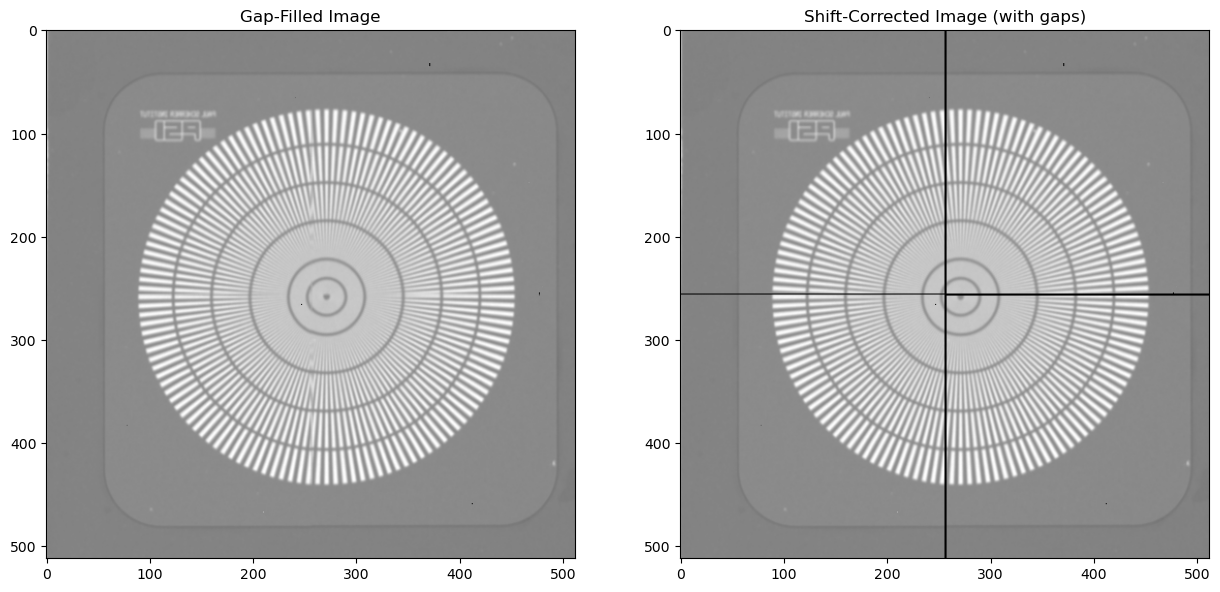

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 10))
axs[0].imshow(gap_filled, cmap='gray')
axs[0].set_title("Gap-Filled Image")
axs[1].imshow(corrected, cmap='gray')
axs[1].set_title("Shift-Corrected Image (with gaps)")